### 1. Importing Libraries.

In [149]:
# Importing Libraries
import numpy as np
import pandas as pd

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import matplotlib.patheffects as path_effects
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

from sklearn.cluster import AgglomerativeClustering

#Sweetviz report
import sweetviz as sv

# Pandas profile
from pandas_profiling import ProfileReport

# Avoid warnings
import warnings
warnings.simplefilter("ignore")

### 2. Loading the data set

In [84]:
# Load data
df = pd.read_csv("marketing_campaign.csv", sep = "\t")

# Information about the data set

People
●	ID: Customer's unique identifier
●	Year_Birth: Customer's birth year
●	Education: Customer's education level
●	Marital_Status: Customer's marital status
●	Income: Customer's yearly household income
●	Kidhome: Number of children in customer's household
●	Teenhome: Number of teenagers in customer's household
●	Dt_Customer: Date of customer's enrollment with the company
●	Recency: Number of days since customer's last purchase
●	Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
●	MntWines: Amount spent on wine in last 2 years
●	MntFruits: Amount spent on fruits in last 2 years
●	MntMeatProducts: Amount spent on meat in last 2 years
●	MntFishProducts: Amount spent on fish in last 2 years
●	MntSweetProducts: Amount spent on sweets in last 2 years
●	MntGoldProds: Amount spent on gold in last 2 years

Promotion
●	NumDealsPurchases: Number of purchases made with a discount
●	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
●	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
●	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
●	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
●	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
●	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
●	NumWebPurchases: Number of purchases made through the company’s website
●	NumCatalogPurchases: Number of purchases made using a catalogue
●	NumStorePurchases: Number of purchases made directly in stores
●	NumWebVisitsMonth: Number of visits to company’s website in the last month

### 3. EDA

In [85]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [86]:
df.shape

(2240, 29)

### Pandas Profile Report:

In [87]:
# pr = ProfileReport(df)
# pr

In [88]:
# # report by sweetviz

# my_report = sv.analyze(df)
# my_report.show_html()

In [89]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
612   6682        1973       Basic        Married  18978.0        1         0   
48    7244        1951  Graduation         Single      NaN        2         1   
347   1826        1970  Graduation       Divorced  84835.0        0         0   
1288  9010        1972      Master        Married  83151.0        0         0   
1248  4298        1973         PhD       Together  20427.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
612   11-12-2012       41         2          8                1   
48    01-01-2014       96        48          5               48   
347   16-06-2014        0       189        104              379   
1288  10-02-2013       80       968        147              842   
1248  24-03-2014       63         5          0                4   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
612                 4                 7            15                  1   
48                  6                10             7                  3   
347               111               189           218                  1   
1288              137                42           210                  1   
1248                0                 0             1                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
612                 1                    0                  3   
48                  2                    1                  4   
347                 4                    4                  6   
1288                5                    7                 10   
1248                1                    0                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
612                   8             0             0             0   
48                    6             0             0             0   
347                   1             0             0             0   
1288                  2             1             0             1   
1248                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
612              0             0         0              3         11         0  
48               0             0         0              3         11         0  
347              0             0         0              3         11         1  
1288             1             0         0              3         11         1  
1248             0             0         0              3         11         0

In [90]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
587   5057        1961      Master        Married  61794.0        0         1   
272   3066        1975         PhD       Together  61905.0        0         1   
2189  1646        1972       Basic        Married  25224.0        1         0   
1185  2292        1985  Graduation         Single  22327.0        1         0   
470   2021        1975  Graduation        Married  61456.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
587   14-09-2013       74       264         47              188   
272   04-02-2014        2       167          0               43   
2189  16-03-2014       36         4          9               12   
1185  02-08-2013       94         5          4                8   
470   27-03-2013       47       563         76              384   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
587                54                47            11                  2   
272                 6                 2            13                  2   
2189               11                 2             8                  2   
1185                2                 0             5                  1   
470                84               192            89                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
587                 4                    4                 10   
272                 4                    2                  4   
2189                1                    1                  3   
1185                1                    0                  3   
470                 6                   10                 13   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
587                   2             0             0             0   
272                   5             0             0             0   
2189                  3             0             0             0   
1185                  5             0             0             0   
470                   4             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
587              0             0         0              3         11         0  
272              0             0         0              3         11         0  
2189             0             0         0              3         11         0  
1185             0             0         0              3         11         0  
470              0             0         0              3         11         0

In [92]:
options = ['Graduation' ,'PhD'] 
    
# selecting rows based on condition 
rslt_df = df[(df['ID'] == 4141) & 
          df['Education'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
2  21-08-2013       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
2              3         11         0  


In [93]:
def basic_info(df):
    print("This dfset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dfset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dfset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dfset: ")
    print(" ")
    print(df.info())

In [94]:
basic_info(df)

This dfset has  29  columns and  2240  rows.
This dfset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dfset: 
 
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.9357

In [95]:
df.median()

ID                      5458.5
Year_Birth              1970.0
Income                 51381.5
Kidhome                    0.0
Teenhome                   0.0
Recency                   49.0
MntWines                 173.5
MntFruits                  8.0
MntMeatProducts           67.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              3.0
Z_Revenue                 11.0
Response                   0.0
dtype: float64

In [96]:
df_copy = df.copy()

In [97]:
# Divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_copy[df_copy.Income.isnull()== False]
missing_income = df_copy[df_copy.Income.isnull()== True]

In [98]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [99]:
# Convert the one that has income to int type
have_income.Income = have_income.Income.astype('int64')

# Give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())

# Coverting String and Float dtypes to int dtype
missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype('int64')

In [100]:
# Combine the data
df_copy = missing_income.append(have_income)

In [101]:
options = ['Graduation' ,'PhD','2n Cycle','Master'] 
    
# selecting rows based on condition 
rslt_df = df_copy[(df_copy['ID'] == 5250) & 
          df_copy['Education'].isin(options)] 
    
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
         ID  Year_Birth Education Marital_Status  Income  Kidhome  Teenhome  \
2084  5250        1943    Master          Widow   51381        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2084  30-10-2013       75       532        126              490   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2084              164               126           126                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2084                5                    5                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2084                  1             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2084             0             0         0              3         11         1  


In [102]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWe

#### 3.1 Issue regarding date 

In [103]:
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

In [104]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nu

#### 3.2 Reset the index

In [105]:
# Reset the index
df_1 = df_copy.reset_index(drop=True)

In [106]:
df_1.sample(5)

ID  Year_Birth Education Marital_Status  Income  Kidhome  Teenhome  \
1491   8370        1976  2n Cycle       Together   75484        0         1   
1095   6072        1970    Master         Single   75345        0         0   
2008  10757        1967       PhD       Divorced   28420        1         0   
1897   2747        1988       PhD        Married   67546        0         0   
1799   7960        1962  2n Cycle       Together   82122        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1491  2012-02-08       50       378         97              259   
1095  2013-02-02       16       918         57              842   
2008  2013-12-24       36         4          2                5   
1897  2012-08-31       90       864        134              768   
1799  2013-08-15       89       734         22              350   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1491              197               194            34                  2   
1095               99                38           133                  1   
2008                2                 0             0                  1   
1897              150                38           172                  1   
1799              151                25           100                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1491                7                    3                  6   
1095                5                    8                  6   
2008                1                    0                  2   
1897                4                   10                  5   
1799                3                    9                 13   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1491                  4             0             0             0   
1095                  3             0             0             0   
2008                  6             0             0             0   
1897                  3             0             0             0   
1799                  1             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1491             0             0         0              3         11         0  
1095             1             0         0              3         11         1  
2008             0             0         0              3         11         0  
1897             0             0         0              3         11         0  
1799             0             0         0              3         11         0

In [107]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 1.2 Visualizations

#### 1.2.1 Analysis -->
a) Uni-Variate Analysis
b) Bi-Variate Analysis
c) Multi-Variate Analysis

In [108]:
#Feature Engineering
#Age of customer today 
df_1["Age"] = 2021-df_1["Year_Birth"]

#Total spendings on various items
df_1["Total_Spent"] = df_1["MntWines"]+ df_1["MntFruits"]+ df_1["MntMeatProducts"]+ df_1["MntFishProducts"]+ df_1["MntSweetProducts"]+ df_1["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_1["Living_With"]=df_1["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df_1["Children"]=df_1["Kidhome"]+df_1["Teenhome"]

#Feature for total members in the householde
df_1["Family_Size"] = df_1["Living_With"].replace({"Alone": 1, "Partner":2})+ df_1["Children"]

#Feature pertaining parenthood
df_1["Is_Parent"] = np.where(df_1.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_1["Education"]=df_1["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df_1=df_1.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})



In [122]:
df_1["Join_year"] = df_1.Dt_Customer.dt.year
df_1["Join_month"] = df_1.Dt_Customer.dt.month
df_1["Join_weekday"] = df_1.Dt_Customer.dt.weekday

df_1['Total_num_purchase'] = df_1.NumDealsPurchases+ df_1.NumWebPurchases+ df_1.NumCatalogPurchases+ df_1.NumStorePurchases+ df_1.NumWebVisitsMonth 
df_1['Total_accept'] = df_1.AcceptedCmp1 + df_1.AcceptedCmp2 + df_1.AcceptedCmp2 + df_1.AcceptedCmp2  + df_1.AcceptedCmp3 + df_1.AcceptedCmp4 + df_1.AcceptedCmp5 + df_1.Response

In [109]:
# Run discriptive statistics of numerical datatypes.
df_1.describe(include = ['float64','int64'])

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.970089     0.444196     0.506250   
std     3246.662198    11.984069   25037.956074     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.000000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency        Wines       Fruits         Meat         Fish  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     49.109375   303.935714    26.302232   166.950000    37.525446   
std      28.962453   336.597393    39.773434   225.715373    54.628979   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000    23.750000     1.000000    16.000000     3.000000   
50%      49.000000   173.500000     8.000000    67.000000    12.000000   
75%      74.000000   504.250000    33.000000   232.000000    50.000000   
max      99.000000  1493.000000   199.000000  1725.000000   259.000000   

            Sweets         Gold  NumDealsPurchases  NumWebPurchases  \
count  2240.000000  2240.000000        2240.000000      2240.000000   
mean     27.062946    44.021875           2.325000         4.084821   
std      41.280498    52.167439           1.932238         2.778714   
min       0.000000     0.000000           0.000000         0.000000   
25%       1.000000     9.000000           1.000000         2.000000   
50%       8.000000    24.000000           2.000000         4.000000   
75%      33.000000    56.000000           3.000000         6.000000   
max     263.000000   362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain  Z_CostContact  Z_Revenue     Response          Age  \
count  2240.000000         2240.0     2240.0  2240.000000  2240.000000   
mean      0.009375            3.0       11.0     0.149107    52.194196   
std       0.096391            0.0        0.0     0.356274    11.984069   
min       0.000000            3.0       11.0     0.000000    25.000000   
25%       0.000000            3.0       11.0     0.000000    44.000000   
50%       0.000000            3.0       11.0     0.000000    51.000000   
75%       0.000000            3.0       11.0     0.000000    62.000000   
max       1.000000            3.0       11.0     1.000000   128.000000   

       Total_Spent     C

In [110]:
# Lets Analysis the Target Variable "Survived"
# Calculate the percentage of people who Survived and Not Survived
df_1["Income"].value_counts()

51381     24
7500      12
35860      4
63841      3
18690      3
39922      3
67445      3
34176      3
18929      3
46098      3
47025      3
48432      3
37760      3
83844      3
80134      3
43776      2
81698      2
35791      2
62807      2
44989      2
62466      2
33039      2
87771      2
15315      2
22419      2
69084      2
19514      2
84169      2
47352      2
71367      2
34935      2
81217      2
72635      2
98777      2
83151      2
38946      2
56962      2
33249      2
41335      2
34824      2
50611      2
86857      2
66476      2
68118      2
22804      2
54690      2
51369      2
58330      2
37070      2
46734      2
73059      2
50616      2
67911      2
66664      2
80124      2
34421      2
59292      2
55212      2
68655      2
35178      2
33996      2
62187      2
63342      2
40321      2
71952      2
22574      2
42386      2
29672      2
38361      2
18701      2
15287      2
37717      2
30372      2
46681      2
56796      2
74293      2
20130      2

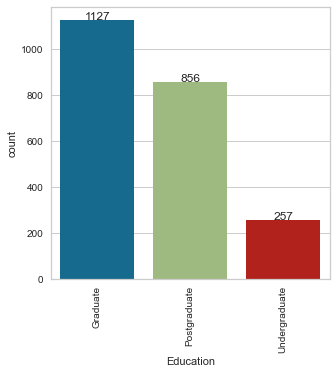

In [111]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Education', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

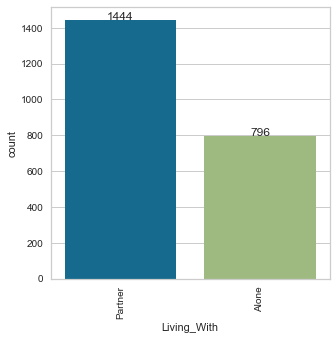

In [116]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Living_With', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

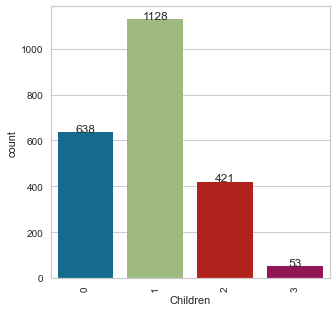

In [119]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Children', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

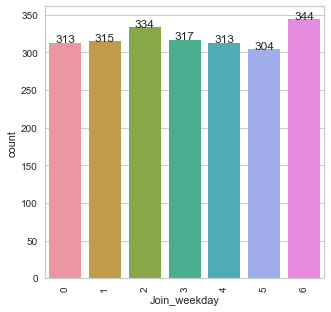

In [123]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Join_weekday', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

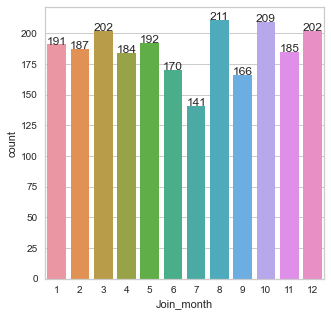

In [125]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Join_month', data=df_1)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

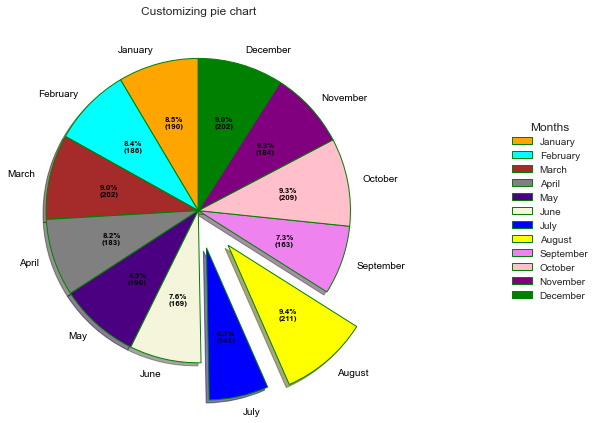

In [126]:
# Creating dataset
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

data = [191,187,202,184,191,170,141,211,164,209,185,202]


# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.25,0.3,0.0,0.0,0.0,0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige","blue","yellow","violet","pink","purple","green")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
autopct = lambda pct: func(pct, data),
explode = explode,
labels = months,
shadow = True,
colors = colors,
startangle = 90,
wedgeprops = wp,
textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, months,
title ="Months",
loc ="center left",
bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


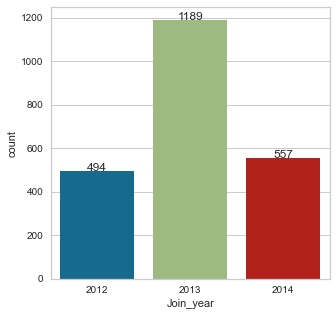

In [127]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Join_year', data=df_1)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<AxesSubplot:xlabel='Income', ylabel='Count'>

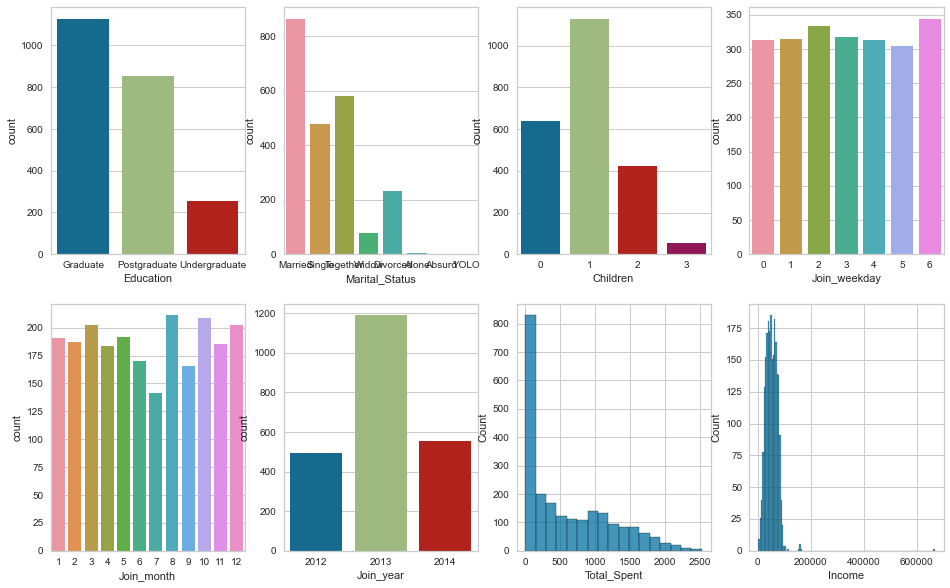

In [129]:
# Combined univariate analysis of each variables
fig,axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot('Education',data=df_1,ax=axes[0,0])
sns.countplot('Marital_Status',data=df_1,ax=axes[0,1])
sns.countplot('Children',data=df_1,ax=axes[0,2])
sns.countplot('Join_weekday',data=df_1,ax=axes[0,3])
sns.countplot('Join_month',data=df_1,ax=axes[1,0])
sns.countplot('Join_year',data=df_1,ax=axes[1,1])

#sns.distplot(df_train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(data=df_1,x="Total_Spent",ax=axes[1,2])
sns.histplot(data=df_1,x="Income",ax=axes[1,3] )


### Bivariate Analysis

We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

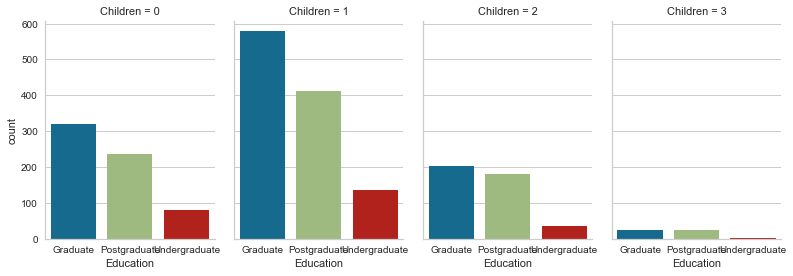

In [132]:
# Lets more elaborate customer behaviour with Education and Income --> use catplot or countplot
'''
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Education',hue="Minorhome",data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
'''

sns.catplot(x="Education",col="Children",data=df_1, kind="count",height=4, aspect =.7)

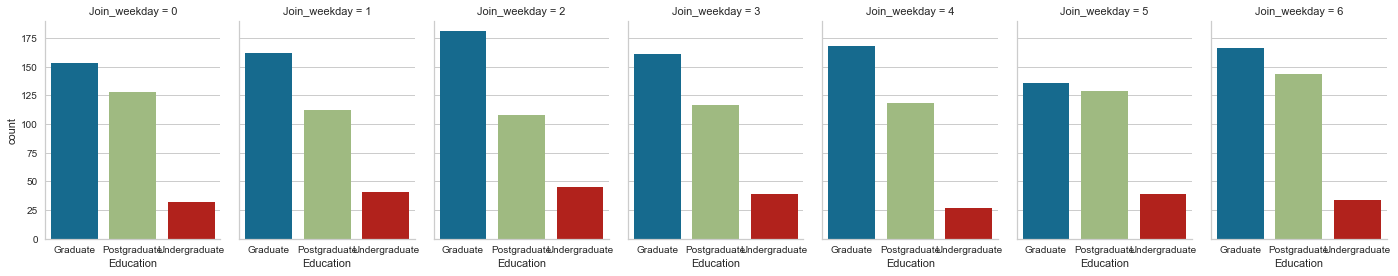

In [133]:
# Lets more elaborate customer behaviour with Education and Income --> use catplot or countplot

sns.catplot(x="Education",col="Join_weekday",data=df_1, kind="count",height=4, aspect =.7)

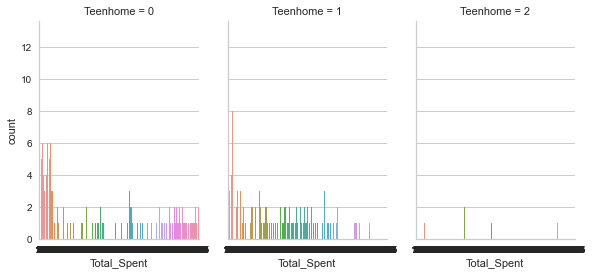

In [134]:
# Lets more elaborate customer behaviour with Teenhome and Total_Spent --> use catplot or countplot
'''
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Total_Spent',hue="Teenhome",data=new_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
'''

sns.catplot(x="Total_Spent",col="Teenhome",data=df_1, kind="count",height=4, aspect =.7)

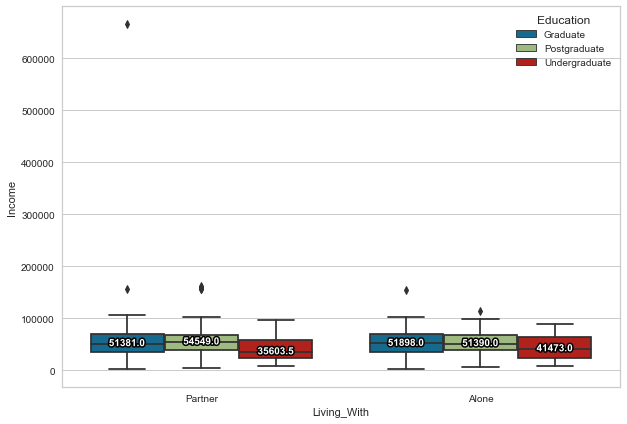

In [137]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Living_With', y='Income', hue='Education', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

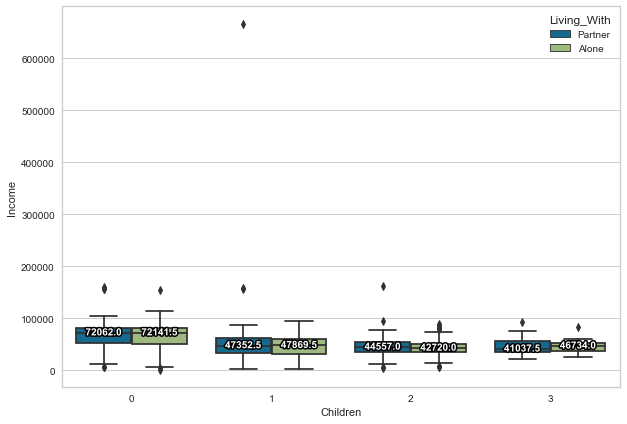

In [145]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Children', y='Income', hue='Living_With', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

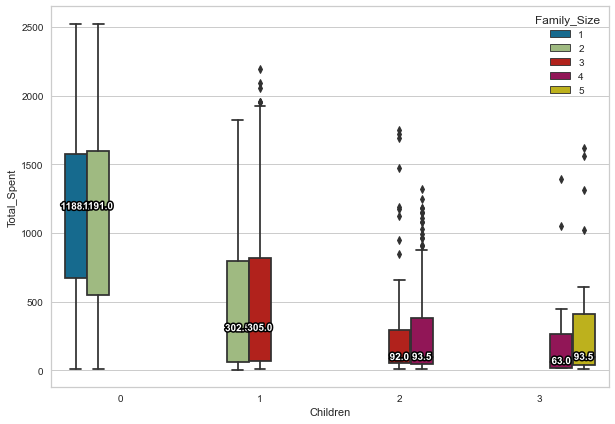

In [143]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Children', y='Total_Spent', hue='Family_Size', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

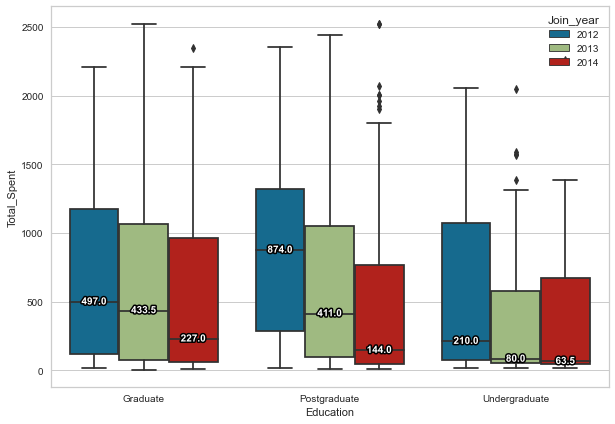

In [147]:
fig, ax1 = plt.subplots(figsize=(10,7))

def main():
    sns.set_style("whitegrid")
    tips = df_1
    # optionally disable fliers
    showfliers = True
    # plot data and create median labels
    box_plot = sns.boxplot(ax=ax1, x='Education', y='Total_Spent', hue='Join_year', data=df_1,
                           showfliers=showfliers)
    create_median_labels(box_plot.axes, showfliers)
    plt.show()


def create_median_labels(ax, has_fliers):
    lines = ax.get_lines()
    # depending on fliers, toggle between 5 and 6 lines per box
    lines_per_box = 5 + int(has_fliers)
    # iterate directly over all median lines, with an interval of lines_per_box
    # this enables labeling of grouped data without relying on tick positions
    for median_line in lines[4:len(lines):lines_per_box]:
        # get center of median line
        mean_x = sum(median_line._x) / len(median_line._x)
        mean_y = sum(median_line._y) / len(median_line._y)
        # print text to center coordinates
        text = ax.text(mean_x, mean_y, f'{mean_y:.1f}',
                       ha='center', va='center',
                       fontweight='bold', size=10, color='white')
        # create small black border around white text
        # for better readability on multi-colored boxes
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal(),
        ])


if __name__ == '__main__':
    main()

In [150]:
education = df_1.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [153]:
df_1.loc[(df_1['Age'] >= 13) & (df_1['Age'] <= 19), 'AgeGroup'] = 'Teen'
df_1.loc[(df_1['Age'] >= 20) & (df_1['Age']<= 39), 'AgeGroup'] = 'Adult'
df_1.loc[(df_1['Age'] >= 40) & (df_1['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df_1.loc[(df_1['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [154]:
children = df_1.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

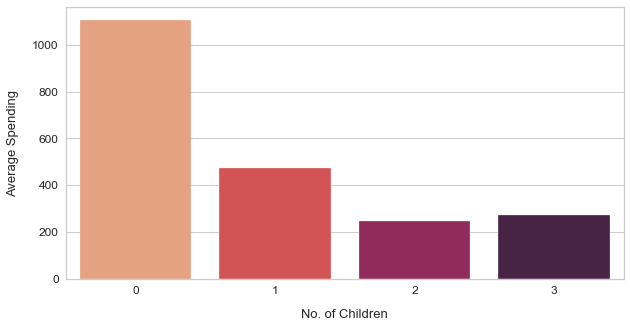

In [156]:
childrenspending = df_1.groupby('Children')['Total_Spent'].mean().sort_values(ascending=False)
childrenspending_df_1 = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df_1,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);

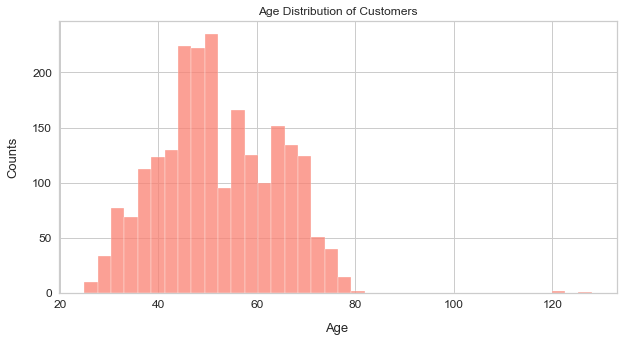

In [159]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df_1.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

In [170]:
lower_age, upper_age = find_IQR(df_1, "Age")
print(lower_age, upper_age)

17.0 89.0


In [175]:
lower_income, upper_income = find_IQR(df_1, "Income")
print(lower_income, upper_income)

-13614.0 117418.0


In [176]:

def find_IQR(df_1, column):
  q_25, q_75 = np.quantile(df_1[column], 0.25), np.quantile(df_1[column], 0.75)
  IQR = q_75 - q_25
  whiskers_range = IQR * 1.5
  lower, upper = q_25 - whiskers_range, whiskers_range + q_75
  return lower, upper

In [177]:
# Drop the outliers
df_1 = df_1[(df_1["Age"] < upper_age)]
df_1 = df_1[(df_1["Income"] < upper_income)]

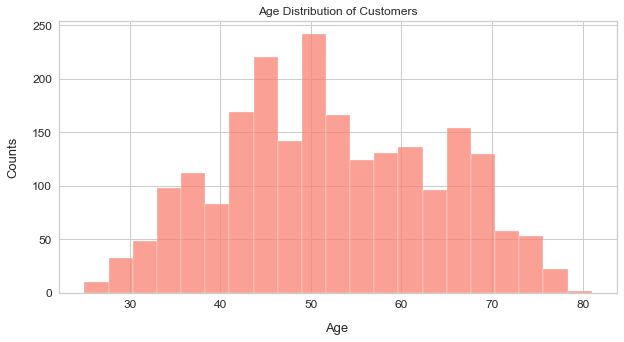

In [179]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df_1.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Age ', fontsize=13, labelpad=13)
plt.ylabel('Counts', fontsize=13, labelpad=13);

The age of customers is almost normally distributed, with the majority of customers between the ages of 40 and 60.

In [181]:
agegroup = df_1.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.4, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 20, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

More than 50% of customers are Middle Age Adults between 40 and 60 The 2nd well-known age category is Adults, aged between 20 and 40

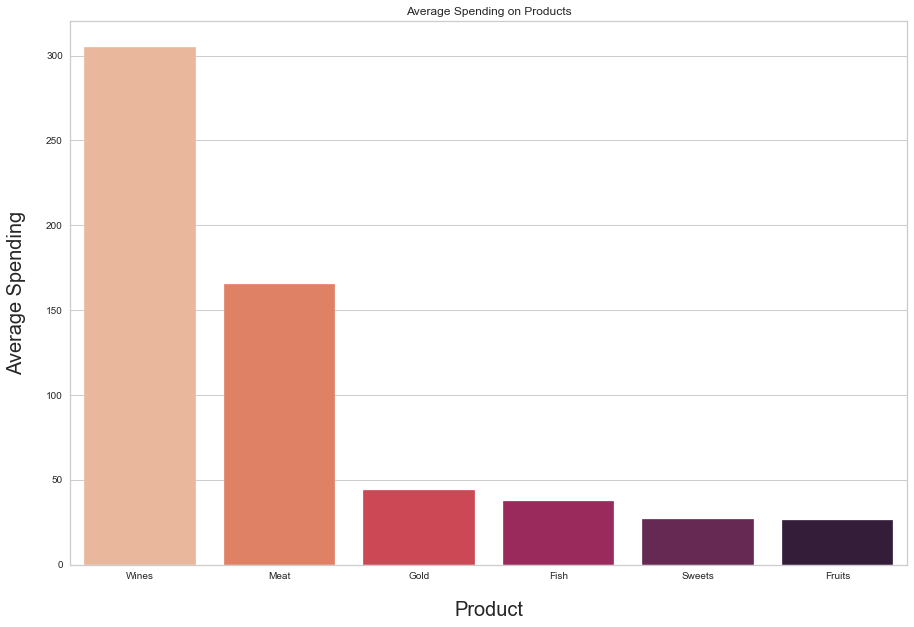

In [189]:
products = df_1[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df_1 = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(15,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df_1, x='Product', y='Average Spending', palette='rocket_r');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Wine and Meat Products are the most famous products among customers Candy and Fruits are not often bought

In [206]:
X = df_2.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','Dt_Customer', 'Z_CostContact','Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)

In [207]:
X.sample(5)

Income  Wines  Fruits  Meat  Fish  Sweets  Gold  Age  Total_Spent  \
1082   70713    736     114   279    82      76   190   55         1477   
164    65747    346      17    48    23      13    13   52          460   
1349   40049     13       6     7     0       3     3   69           32   
752    34941     39       2    25     4       3    24   65           97   
1992   21994      9       0     6     3       1     3   64           22   

      Living_With  Children  Family_Size  Is_Parent  Clusters  Total_Promos  \
1082            1         1            3          1         3             0   
164             1         1            3          1         2             1   
1349            0         1            2          1         2             0   
752             1         2            4          1         2             0   
1992            1         1            3          1         2             0   

      Total_Purchases  
1082               28  
164                25  
1349               11  
752                16  
1992                9

In [209]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

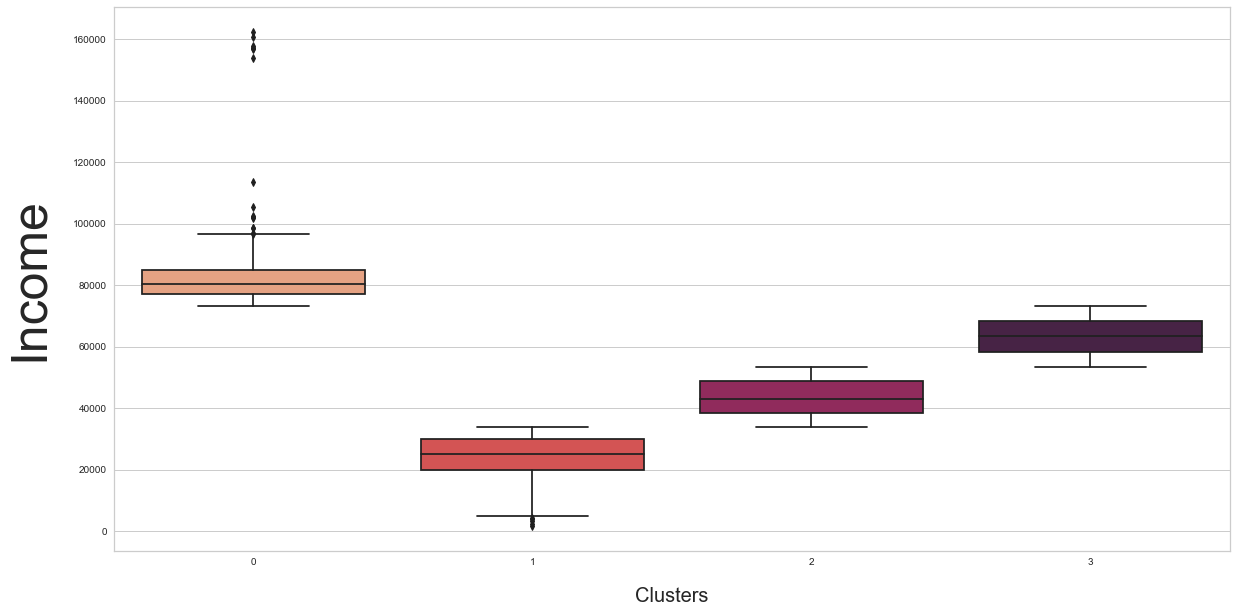

In [210]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20);

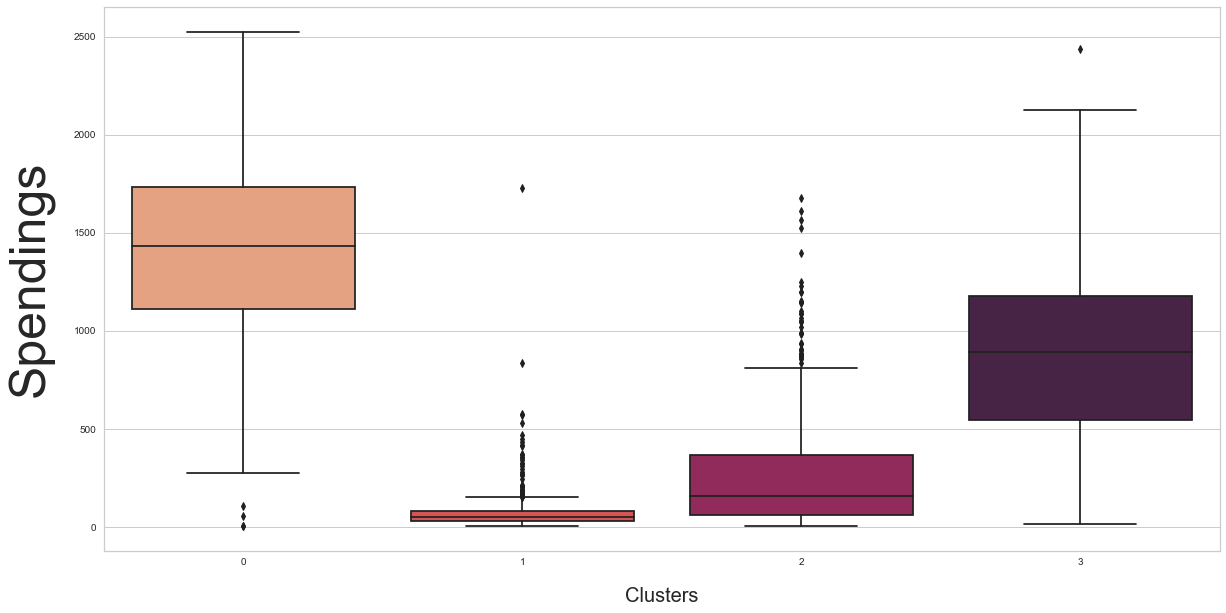

In [212]:
#Total Spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Total_Spent',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=50, labelpad=20);


In [214]:
#Month Since Customer
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=50, labelpad=20);

ValueError: Could not interpret input 'Month_Customer'

<Figure size 1440x720 with 0 Axes>

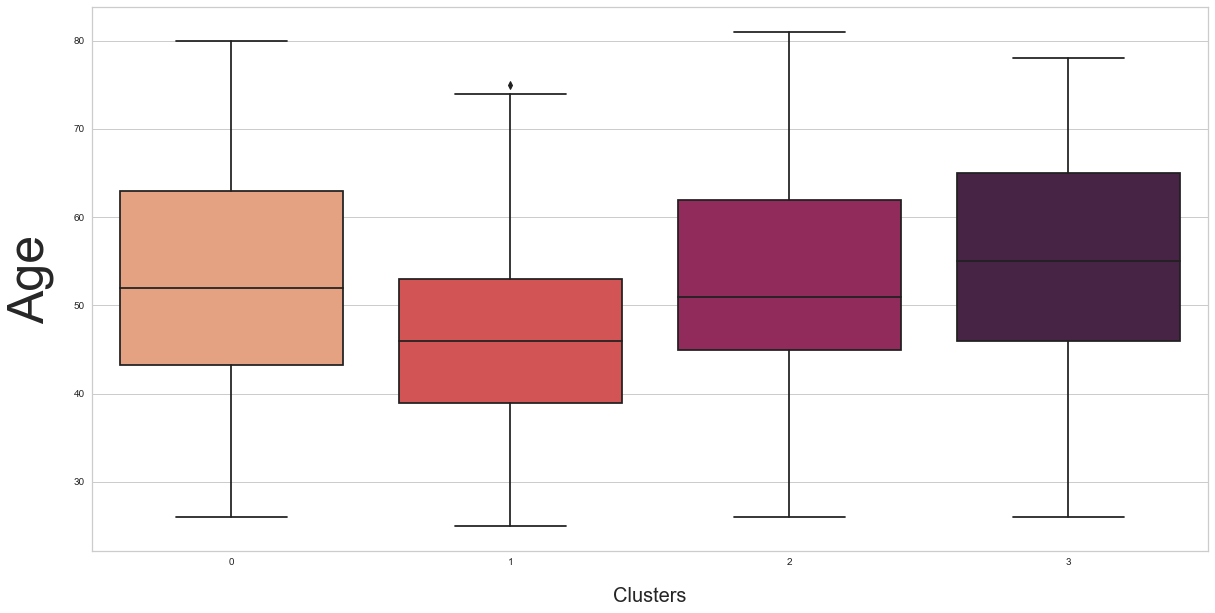

In [215]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=50, labelpad=20);

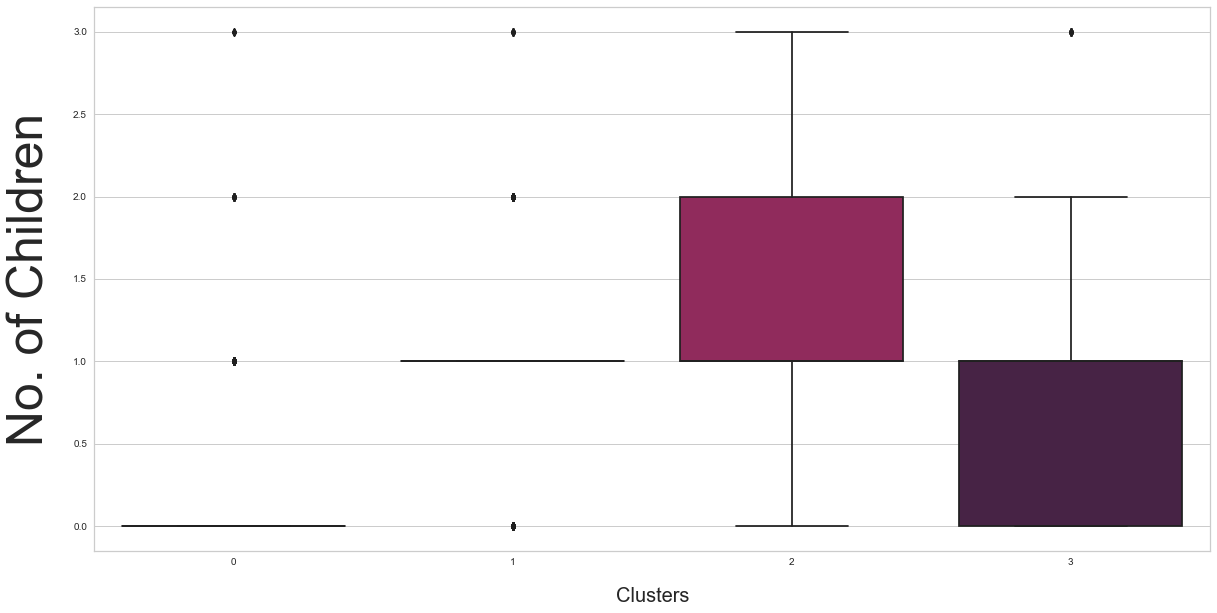

In [217]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('No. of Children', fontsize=50, labelpad=20);


### From the above analysis we can group customers into 4 groups based on their income and total expenses:

### Platinum: Highest income and highest expense

### Gold: High earners and high spenders

### Silver: The one with lower salary and less expenses

### Bronze: The one with the lowest salary and least expenses

#### 1.2.1 Check the outliers

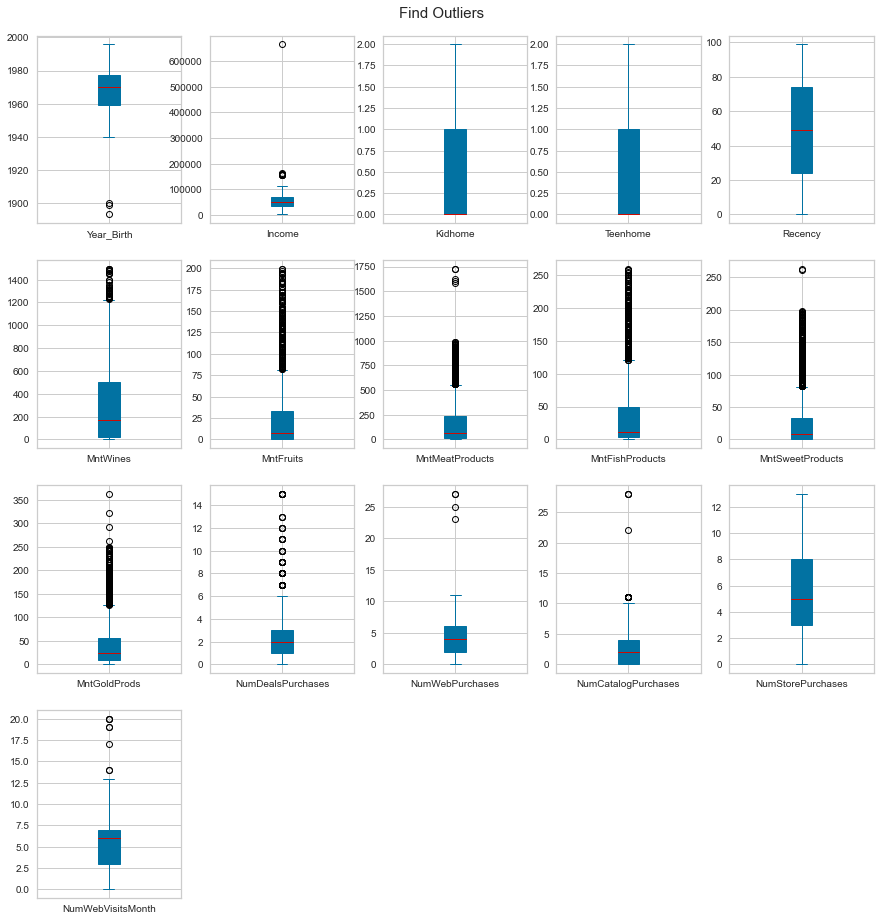

In [26]:
# select columns to plot
# Dropping the categorical columns/ un-useful columns(ID) --> to plot outliers
df_1_to_plot = df_1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Z_CostContact','Z_Revenue']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_1_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### Treating outliers (using emperical formula (µ - 3σ) )

In [27]:
df_1.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [28]:
# Remove outliers in year_birth -->(µ - 3σ)

df_1 = df_1[df_1.Year_Birth >= (df_1.Year_Birth.mean()-3*df_1.Year_Birth.std())]
df_1.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

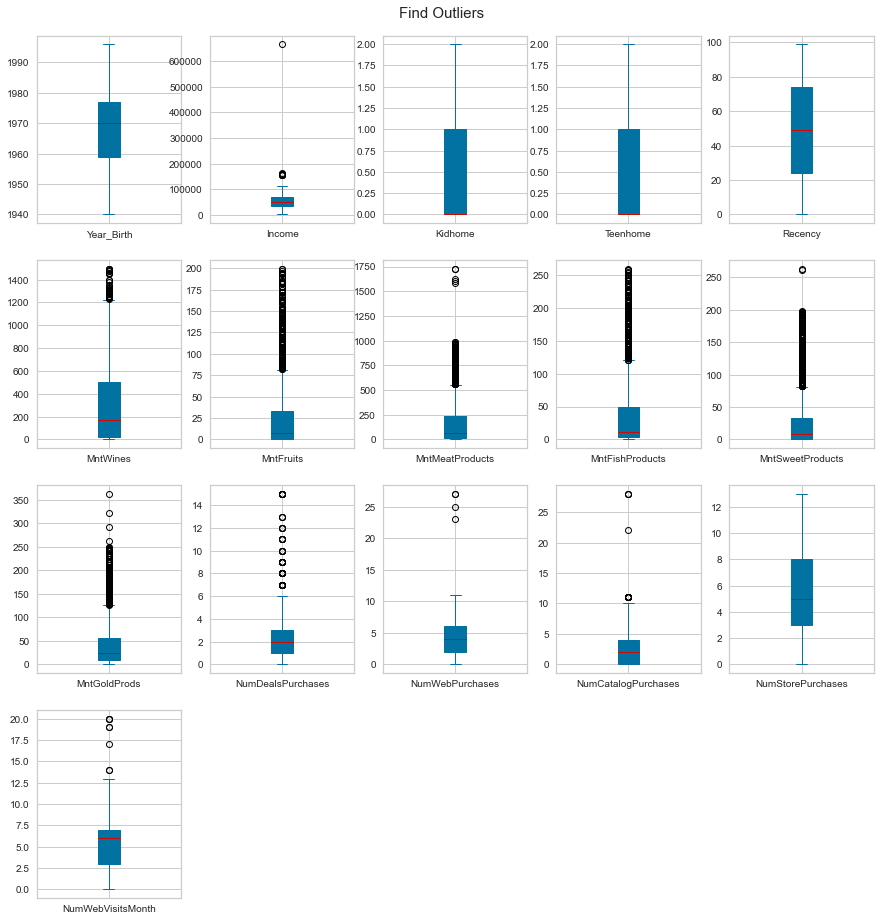

In [29]:
# Outliers after treating on them
df_1_to_plot = df_1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Z_CostContact','Z_Revenue']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_1_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [77]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df_1 = df_1.drop(to_drop, axis=1)

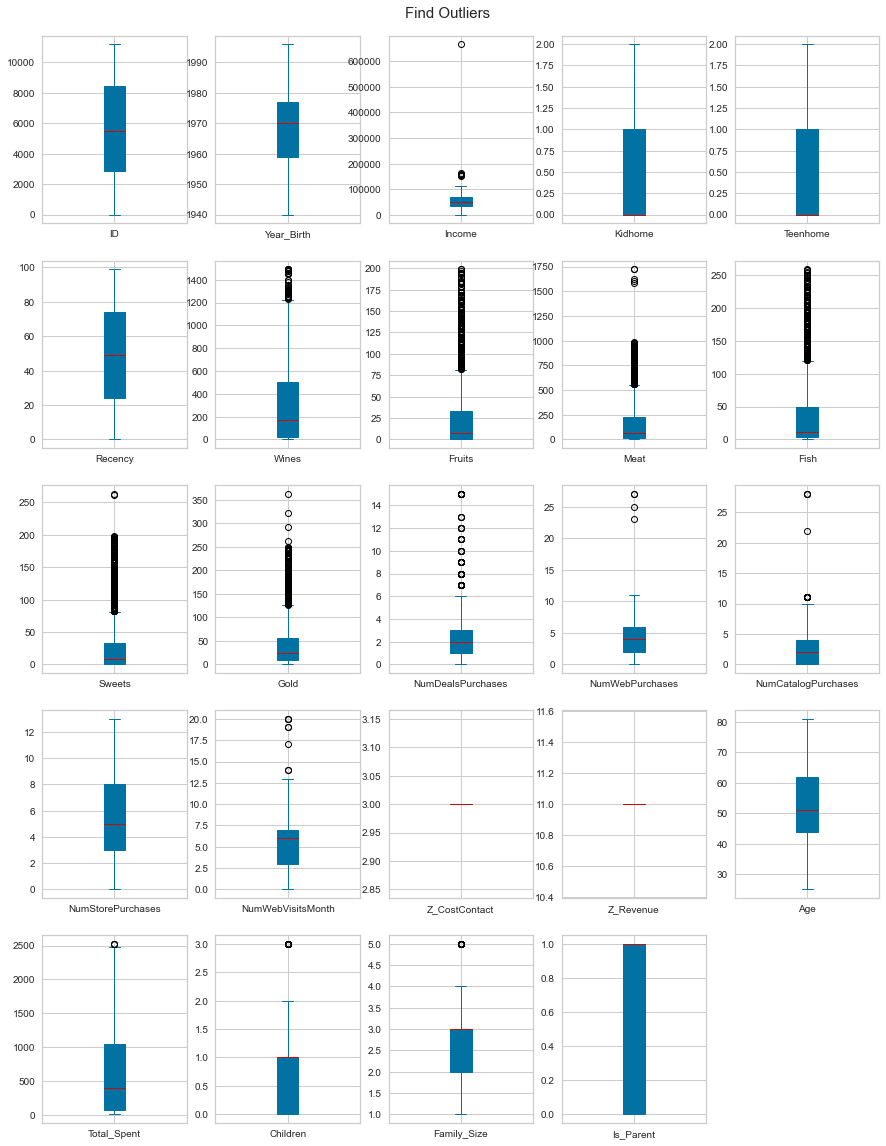

In [31]:
# Outliers after treating on them
df_2_to_plot = df_1.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_2_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [32]:
#Dropping the outliers by setting a cap on income. 
df_2 =df_1[(df_1["Income"]<600000)]
print("The total number points after removing the outliers are:", len(df_2))

The total number points after removing the outliers are: 2236


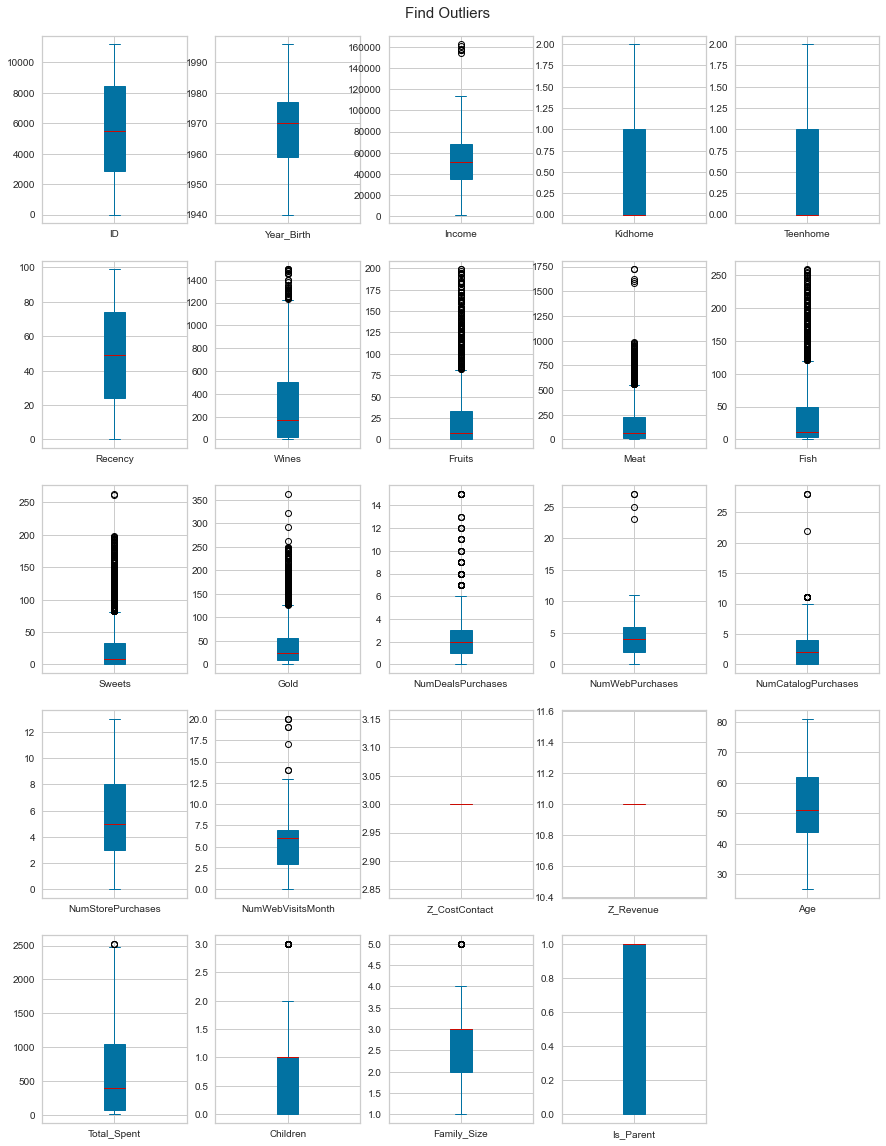

In [33]:
# Outliers after traey=ting on them
df_2_to_plot = df_2.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots: layout=(rows,columns) ; kind='Type of boxblot' ; patch_artist=True (To fill the boxplot with colour)
df_2_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(15,20), patch_artist=True)

plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

In [34]:
df_2.sample(5)

ID  Year_Birth     Education Marital_Status  Income  Kidhome  \
1128   1175        1983  Postgraduate        Married   36262        0   
1571  10699        1985      Graduate        Married   44322        1   
1792   9648        1967      Graduate         Single   46904        1   
1921   7101        1963  Postgraduate          Widow   52278        0   
2167   2429        1954      Graduate       Divorced   72071        0   

      Teenhome Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
1128         0  2013-09-20       24     88      39    54    64      28   153   
1571         0  2014-06-16       30     46       0    40     3       0     3   
1792         1  2012-03-11       20    153       4    56     0       9    31   
1921         1  2013-01-25       24    953       0    71     0       0   174   
2167         1  2013-02-14        4    531      69   300   150     138   150   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1128                  1                3                    5   
1571                  2                3                    0   
1792                  4                5                    1   
1921                  6               10                    5   
2167                  3                5                    4   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1128                  3                  6             1             0   
1571                  3                  8             0             0   
1792                  4                  8             0             0   
1921                 10                  8             0             0   
2167                  8                  2             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1128             0             0             0         0              3   
1571             0             0             0         0              3   
1792             0             0             0         0              3   
1921             0             0             0         0              3   
2167             0             0             0         0              3   

      Z_Revenue  Response  Age  Total_Spent Living_With  Children  \
1128         11         1   38          426     Partner         0   
1571         11         0   36           92     Partner         1   
1792         11         0   54          253       Alone         2   
1921         11         0   58         1198       Alone         1   
2167         11         0   67         1338       Alone         1   

      Family_Size  Is_Parent  
1128            2          0  
1571            3          1  
1792            3          1  
1921            2          1  
2167            2          1

In [35]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   Wines                2236 non-null   int64         
 10  Fruits               2236 non-null   int64         
 11  Meat                 2236 non-null   int64         
 12  Fish                 2236 non-null   int64         
 13  Sweets               2236 non-nul

<AxesSubplot:>

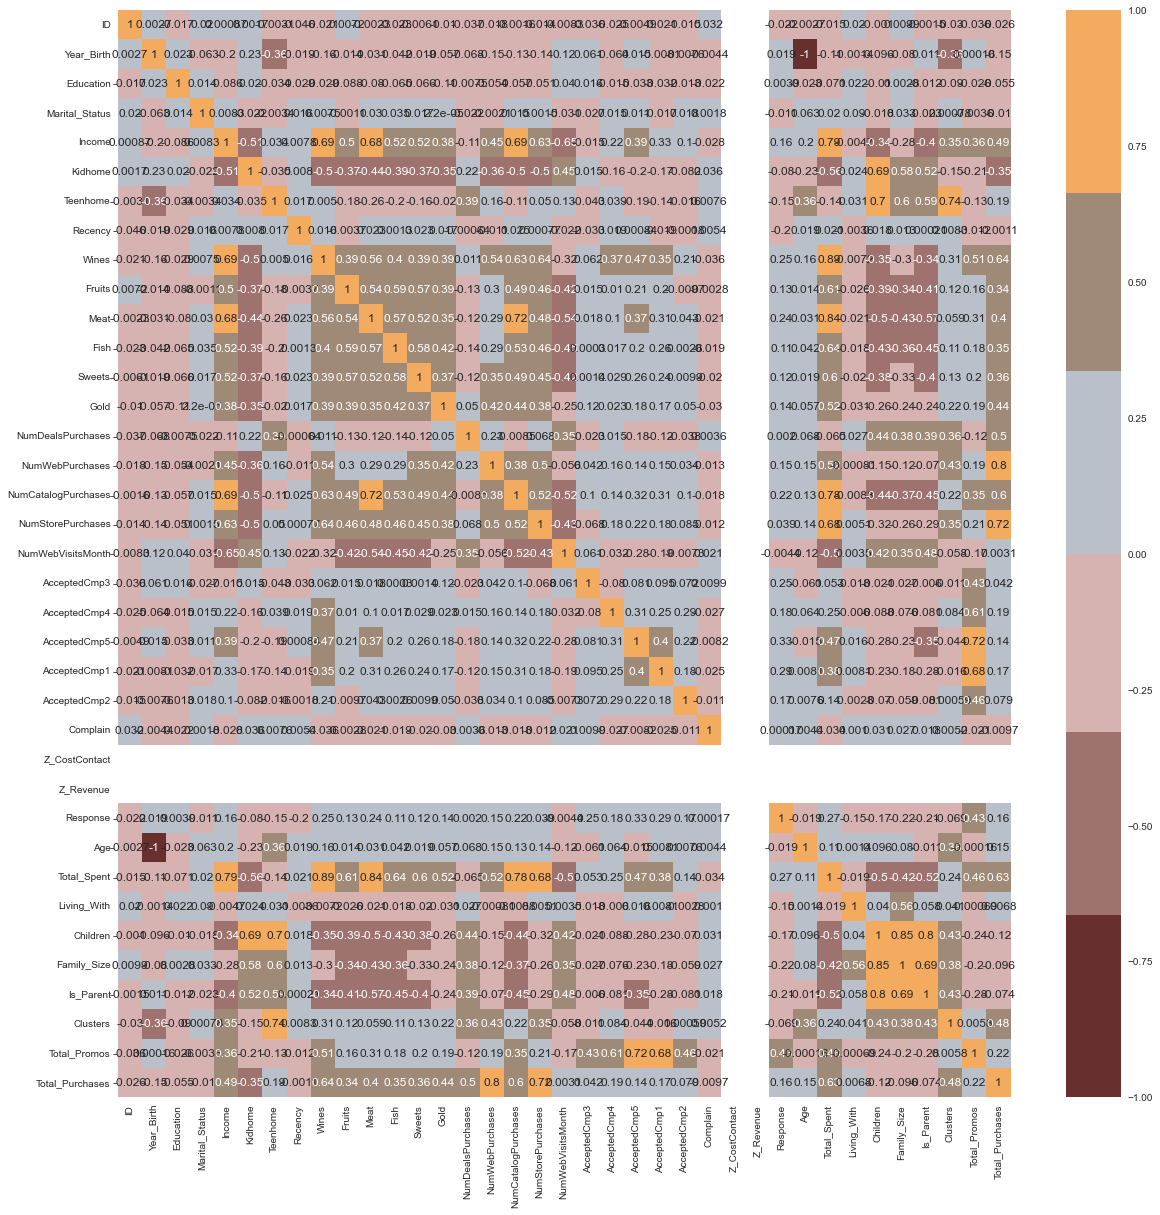

In [185]:
#correlation matrix

cmap =ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

corrmat= df_2.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [37]:
# Run discriptive statistics of numerical datatypes.
df_1.describe(include = ['float64','int64'])

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2237.000000  2237.000000    2237.000000  2237.000000  2237.000000   
mean    5590.726419  1968.901654   52227.402325     0.444345     0.506482   
std     3245.118591    11.701917   25043.267011     0.538467     0.544593   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2829.000000  1959.000000   35523.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51381.000000     0.000000     0.000000   
75%     8427.000000  1977.000000   68281.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency        Wines       Fruits         Meat         Fish  \
count  2237.000000  2237.000000  2237.000000  2237.000000  2237.000000   
mean     49.104604   303.995530    26.270451   166.916853    37.523022   
std      28.956073   336.574382    39.715972   225.661158    54.639909   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000    24.000000     1.000000    16.000000     3.000000   
50%      49.000000   174.000000     8.000000    67.000000    12.000000   
75%      74.000000   504.000000    33.000000   232.000000    50.000000   
max      99.000000  1493.000000   199.000000  1725.000000   259.000000   

            Sweets         Gold  NumDealsPurchases  NumWebPurchases  \
count  2237.000000  2237.000000        2237.000000      2237.000000   
mean     27.068842    43.968708           2.326777         4.087170   
std      41.293949    52.054318           1.932923         2.779461   
min       0.000000     0.000000           0.000000         0.000000   
25%       1.000000     9.000000           1.000000         2.000000   
50%       8.000000    24.000000           2.000000         4.000000   
75%      33.000000    56.000000           3.000000         6.000000   
max     263.000000   362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2237.000000        2237.000000        2237.000000   
mean              2.662494           5.794367           5.319177   
std               2.923456           3.250940           2.426386   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2237.000000   2237.000000   2237.000000   2237.000000   2237.000000   
mean       0.072865      0.074654      0.072418      0.064372      0.013411   
std        0.259974      0.262890      0.259237      0.245469      0.115052   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain  Z_CostContact  Z_Revenue     Response          Age  \
count  2237.000000         2237.0     2237.0  2237.000000  2237.000000   
mean      0.008941            3.0       11.0     0.149307    52.098346   
std       0.094152            0.0        0.0     0.356471    11.701917   
min       0.000000            3.0       11.0     0.000000    25.000000   
25%       0.000000            3.0       11.0     0.000000    44.000000   
50%       0.000000            3.0       11.0     0.000000    51.000000   
75%       0.000000            3.0       11.0     0.000000    62.000000   
max       1.000000            3.0       11.0     1.000000    81.000000   

       Total_Spent     C

In [38]:
# Lets Analysis the Target Variable "Survived"
# Calculate the percentage of people who Survived and Not Survived
# df_2["Income"].value_counts(5)

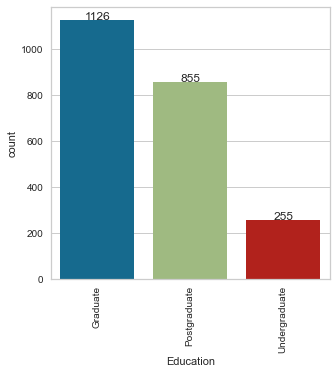

In [39]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Education', data=df_2)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

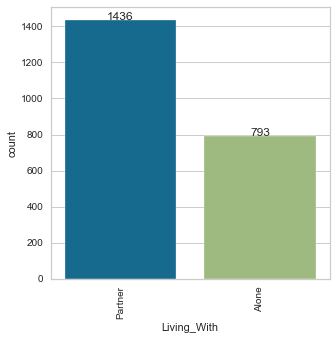

In [184]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Living_With', data=df_1)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### 4. Data Pre-processing

In [41]:
#Get list of categorical variables:

s = (df_2.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Living_With']


In [42]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df_2[i]= df_2[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [43]:
df_2.sample(5)

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
925   10619        1994          0               4   95529        0         0   
1429   2561        1966          0               4   63810        0         1   
875    4120        1975          2               4   49514        1         0   
1162   8310        1964          0               5   68142        0         1   
1450   4530        1948          1               6   78427        0         0   

     Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
925   2012-03-12       29    770      29   890   250      27    24   
1429  2012-11-11       45    977      12   253    16      12   101   
875   2013-12-17       61     88      39    78    58      13    93   
1162  2012-08-29       96    897     126   196    91     112    37   
1450  2012-10-24       36    972      19   595   180      26   138   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
925                   1                7                    3   
1429                  4                4                    3   
875                   2                6                    1   
1162                  3               10                    4   
1450                  3                3                    7   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
925                   7                  3             0             0   
1429                 12                  8             0             1   
875                   4                  7             0             0   
1162                  7                  6             0             0   
1450                 10                  3             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
925              1             0             0         0              3   
1429             0             0             0         0              3   
875              0             0             0         0              3   
1162             0             0             0         0              3   
1450             0             1             0         0              3   

      Z_Revenue  Response  Age  Total_Spent  Living_With  Children  \
925          11         1   27         1990            0         0   
1429         11         0   55         1371            0         1   
875          11         0   46          369            0         1   
1162         11         0   57         1459            1         1   
1450         11         1   73         1930            0         0   

      Family_Size  Is_Parent  
925             1          0  
1429            2          1  
875             2          1  
1162            3          1  
1450            1          0

In [44]:
#Creating a copy of data
df_std = df_2.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
df_std = df_std.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(df_std)
scaled_df_std = pd.DataFrame(scaler.transform(df_std),columns= df_std.columns )
print("All features are now scaled")

All features are now scaled


In [45]:
#Scaled data to be used for reducing the dimensionality

print("Dataframe to be used for further modelling:")
scaled_df_std.sample(5)

Dataframe to be used for further modelling:


ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
50    1.181526    1.718019   -0.89438       -0.678101 -0.634970  1.032627   
1002 -1.217289   -1.273264   -0.89438       -1.607735  0.590208  1.032627   
1042 -1.408405    0.350576   -0.89438       -0.678101  1.291204 -0.824939   
1269 -0.496288    1.205228    0.57070       -1.607735  1.809454 -0.824939   
2043  0.012019    1.119763   -0.89438        1.181168  0.442077 -0.824939   

      Teenhome   Recency     Wines    Fruits      Meat      Fish    Sweets  \
50   -0.930615 -0.798467 -0.796774 -0.611252 -0.553908 -0.320963 -0.147262   
1002  0.905974 -0.004016 -0.707625 -0.661610 -0.669137 -0.687019 -0.510544   
1042 -0.930615  0.721352  0.136316  0.849149  1.777247  1.326293  2.565241   
1269 -0.930615  1.688510  2.014381 -0.233562  2.238160 -0.266054  0.167582   
2043 -0.930615 -0.833009  1.616184  3.216006  0.691443  2.991851  0.821489   

          Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
50   -0.652892          -0.168700        -0.751127            -0.568970   
1002 -0.460769          -0.168700        -1.110921            -0.568970   
1042  1.940771          -0.686137         0.328256             1.141459   
1269  0.134813          -0.686137         0.688050            -0.226884   
2043  0.653546          -0.686137         2.127228             0.115201   

      NumStorePurchases  NumWebVisitsMonth  Z_CostContact  Z_Revenue  \
50            -0.552429          -0.955707            0.0        0.0   
1002          -0.552429          -0.955707            0.0        0.0   
1042           0.370533          -1.367850            0.0        0.0   
1269           0.678188          -1.367850            0.0        0.0   
2043           1.293496           0.280722            0.0        0.0   

           Age  Total_Spent  Living_With  Children  Family_Size  Is_Parent  
50   -1.718019    -0.789368     0.742041  0.065416     0.445618   0.631169  
1002  1.273264    -0.827591    -1.347635  1.395139     0.445618   0.631169  
1042 -0.350576     1.263046     0.742041 -1.264308    -0.656596  -1.584362  
1269 -1.205228     1.949400    -1.347635 -1.264308    -1.758810  -1.584362  
2043 -1.119763     1.759946     0.742041 -1.264308    -0.656596  -1.584362

### 5. Dimensional Reduction

In [46]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df_std)
PCA_ds = pd.DataFrame(pca.transform(scaled_df_std), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0 -2.284001e-17  2.874342 -5.908190 -2.557608 -0.779135  2.369022   
col2  2236.0  1.064543e-16  1.770142 -4.632911 -1.434717  0.023180  1.340581   
col3  2236.0 -4.448836e-17  1.360820 -4.583009 -0.944225 -0.083847  0.937318   

           max  
col1  7.455580  
col2  6.104220  
col3  4.850499

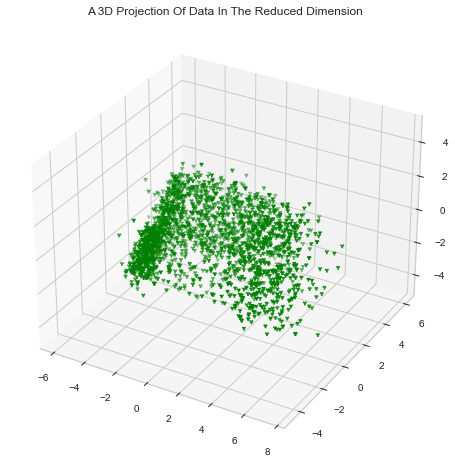

In [47]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="1") # c="colour of points" and marker = "shape of the points ex: circle,square.etc"
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()




In [48]:

#Ploting result data with the use of scatterplot. plotly
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color='green',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

### 6. Clustering

#### 6.1 Elbow Method --> to determine no. of clusters

Elbow Method to determine the number of clusters to be formed:


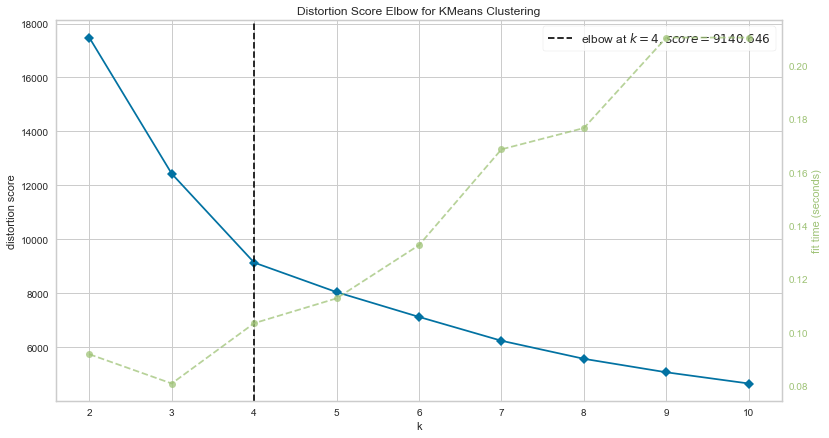

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [200]:
# Elbow method:

fig = plt.figure(figsize=(13,7))
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [199]:
X.columns

Index(['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age',
       'Total_Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Join_year', 'Join_month', 'Join_weekday', 'Total_num_purchase',
       'Total_accept'],
      dtype='object')

In [204]:
X.sample(6)

Income  Wines  Fruits  Meat  Fish  Sweets  Gold  Age  Total_Spent  \
264    29938      3       3     7     0       2    11   36           26   
923    52278    953       0    71     0       0   174   58         1198   
1929   91249   1324      27   119    71     108    27   65         1676   
789    51124     26       1    11     0       1     4   66           43   
63     20559     13       1    29     3       0     7   36           53   
2183   42523     14      36    11     3      26    35   57          125   

     Living_With  Children  Family_Size  Is_Parent  Join_year  Join_month  \
264        Alone         1            2          1       2013          10   
923        Alone         1            2          1       2013           1   
1929       Alone         0            1          0       2012          10   
789        Alone         2            3          1       2013          12   
63       Partner         1            3          1       2013          12   
2183     Partner         0            2          0       2014           4   

      Join_weekday  Total_num_purchase  Total_accept  
264              6                  12             0  
923              4                  39             1  
1929             5                  26             7  
789              2                   9             0  
63               1                  15             0  
2183             2                   9             0

In [202]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

ValueError: could not convert string to float: 'Partner'

In [50]:
#Initiating the Agglomerative Clustering model with k = 4
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_2["Clusters"]= yhat_AC

In [51]:
df_2.sample(3)

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
438   8746        1989          0               3   75433        1         0   
956   3202        1987          1               3   51563        0         0   
2090  7901        1971          1               3   34109        0         1   

     Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
438   2014-05-04       28    800       0   297     0      34    57   
956   2012-01-10       60   1166       0    48     0       0    36   
2090  2013-06-11       39      9       1     5     2       1     4   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
438                   2                2                    5   
956                   1                4                    4   
2090                  1                0                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
438                  10                  6             0             1   
956                  10                  8             0             1   
2090                  3                  4             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
438              0             1             0         0              3   
956              1             0             0         0              3   
2090             0             0             0         0              3   

      Z_Revenue  Response  Age  Total_Spent  Living_With  Children  \
438          11         0   32         1188            1         1   
956          11         0   34         1250            1         0   
2090         11         0   50           22            1         1   

      Family_Size  Is_Parent  Clusters  
438             3          1         3  
956             2          0         0  
2090            3          1         2

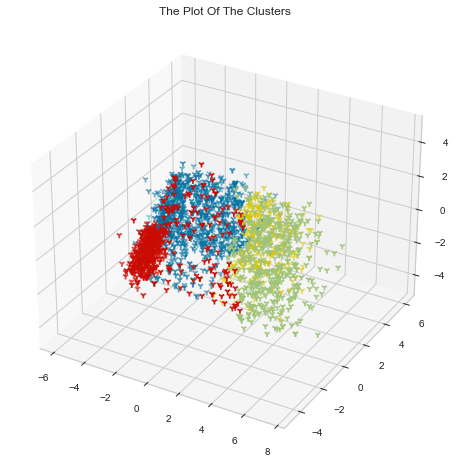

In [52]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
colors = ListedColormap(['r','g','b','y'])
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='1', cmap = colors )
ax.set_title("The Plot Of The Clusters")
plt.show()




In [53]:
#Ploting result data with the use of scatterplot. plotly
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

 
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=x,opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

### Visualizing the Clusters

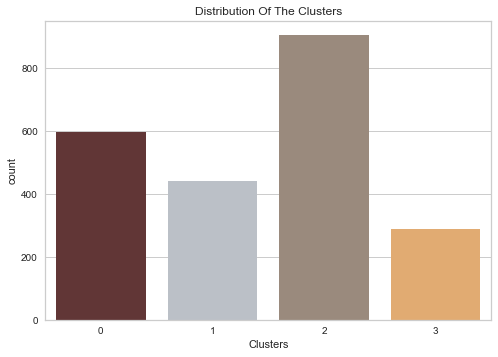

In [54]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_2["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

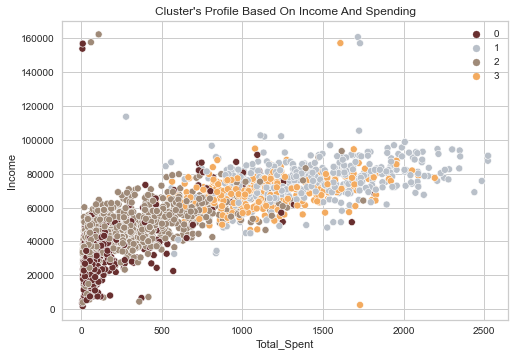

In [55]:
pl = sns.scatterplot(data= df_2,x=df_2["Total_Spent"], y=df_2["Income"],hue=df_2["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


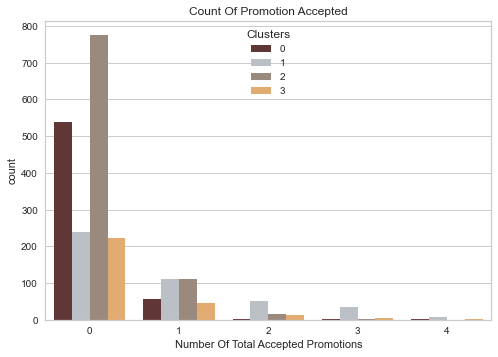

In [56]:
#Creating a feature to get a sum of accepted promotions 
df_2["Total_Promos"] = df_2["AcceptedCmp1"]+ df_2["AcceptedCmp2"]+ df_2["AcceptedCmp3"]+ df_2["AcceptedCmp4"]+ df_2["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df_2["Total_Promos"],hue=df_2["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

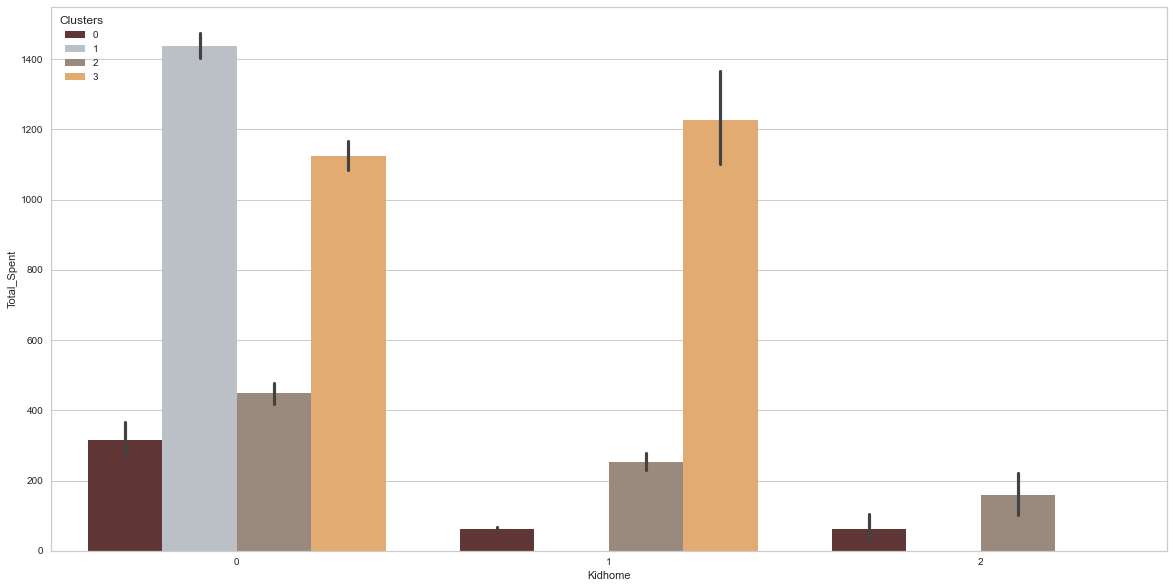

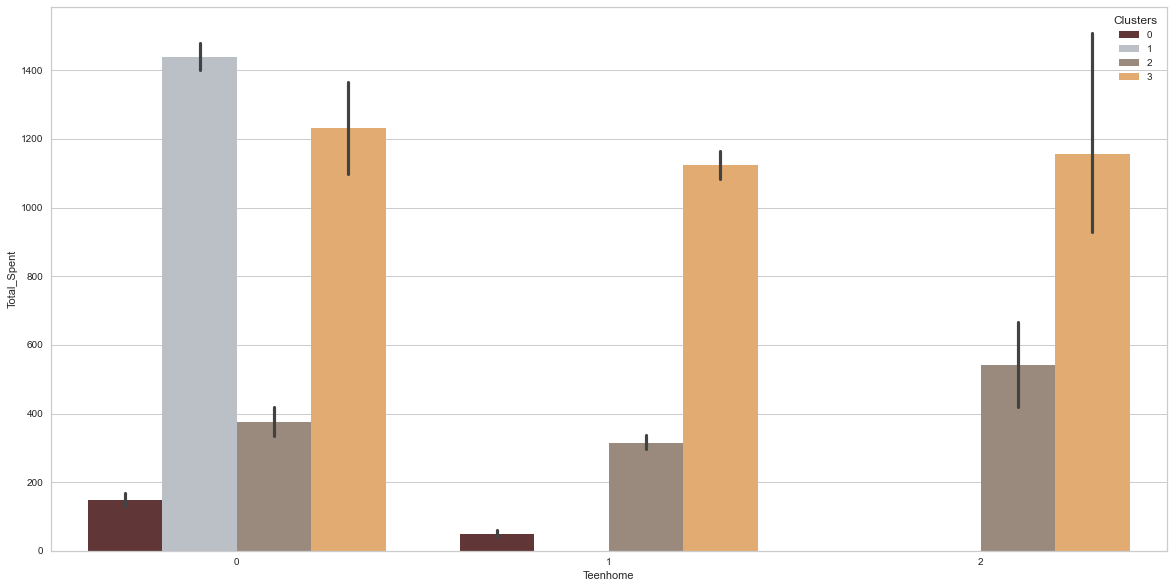

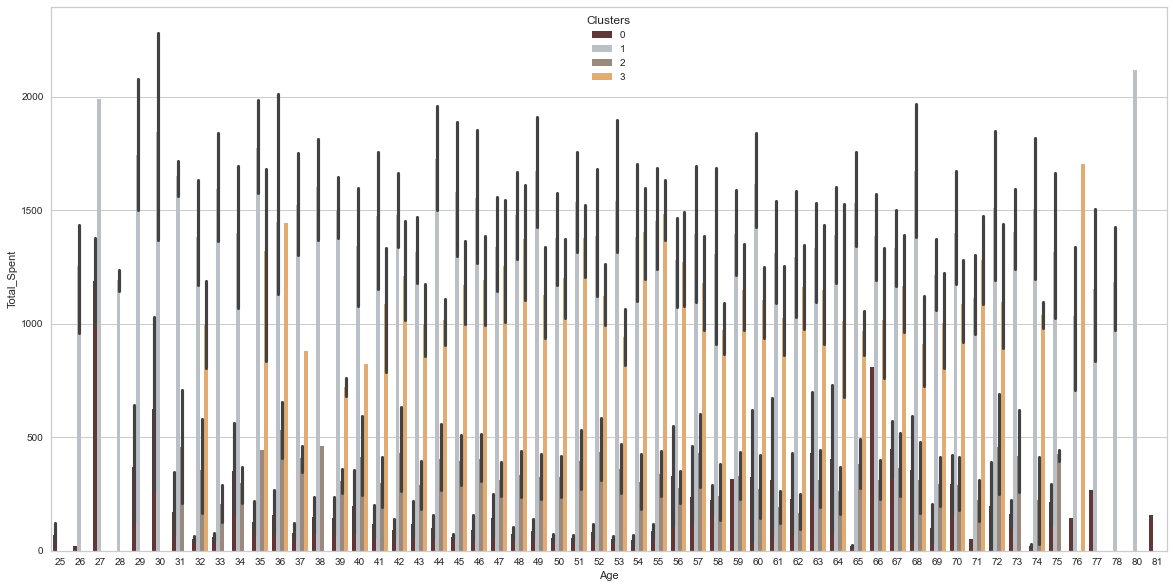

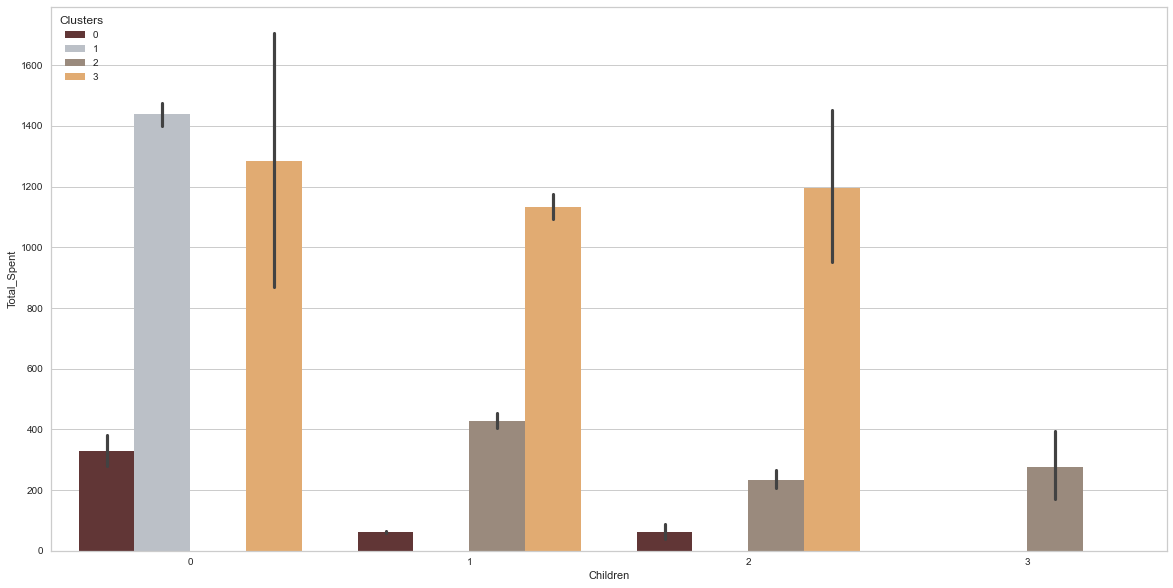

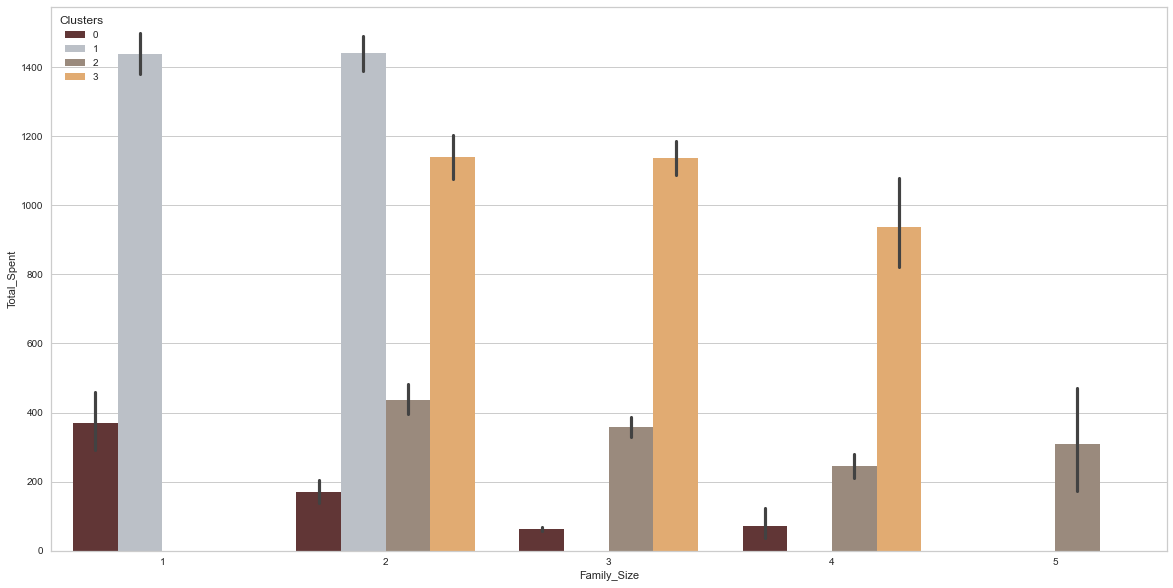

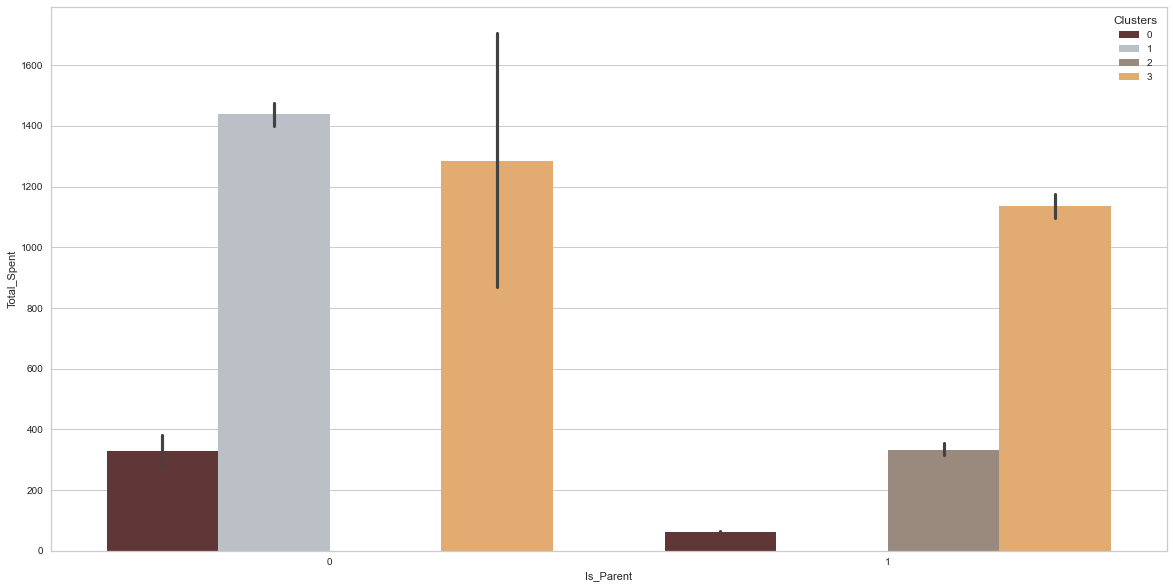

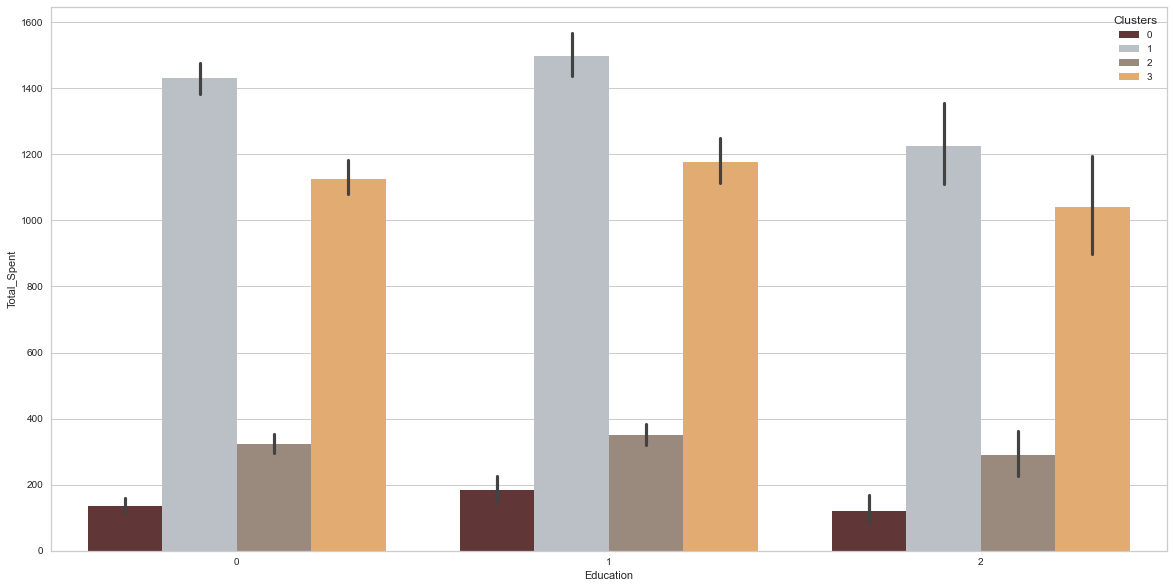

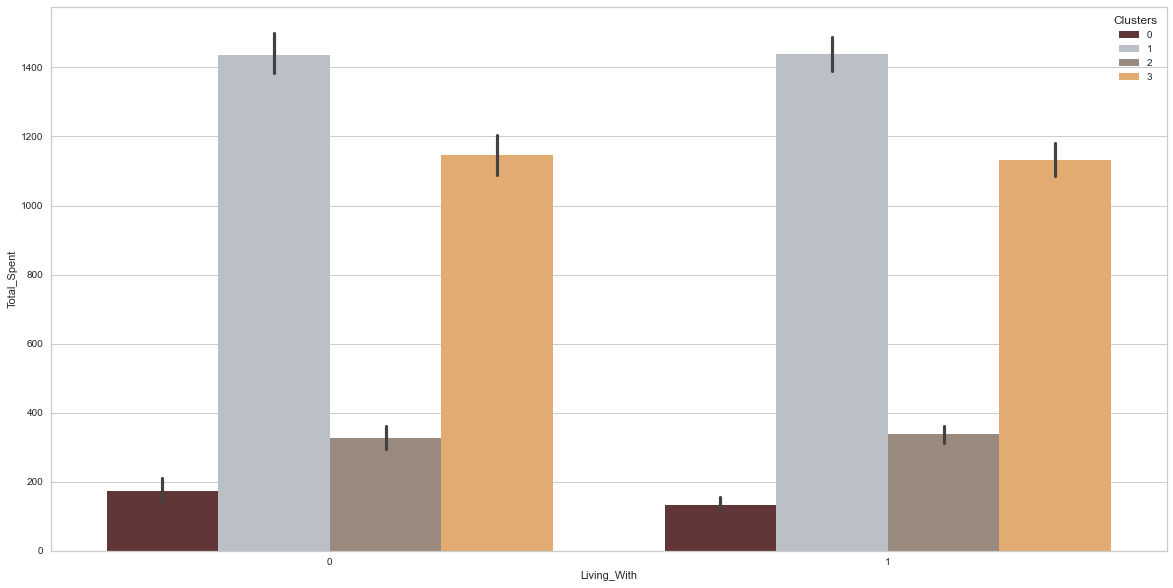

In [57]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure(figsize=(20,10))
    sns.barplot(x=df_2[i], y=df_2["Total_Spent"], hue =df_2["Clusters"], palette=pal)
    plt.show()

In [58]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= df_2.iloc[:,[2,26]].values

In [59]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

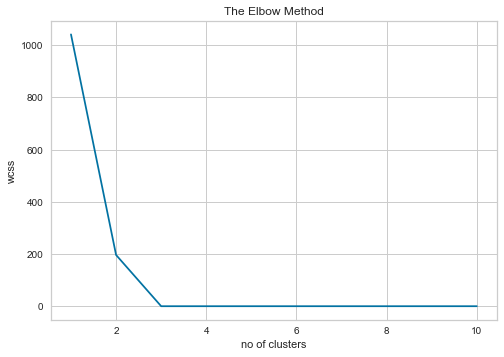

In [60]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

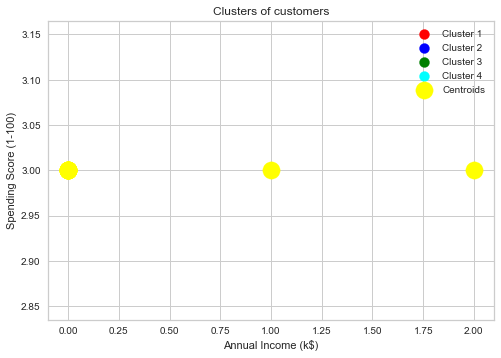

In [62]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

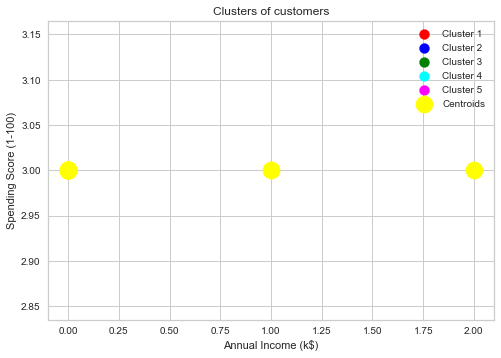

In [63]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [64]:
df_2.sample(3)

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
1297   339        1972          1               3   57091        0         1   
670   6940        1966          1               4   46734        1         2   
730   1463        1958          0               4   45160        1         1   

     Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
1297  2012-11-23       82    462       0    24     6       0     4   
670   2013-10-21       86    100       1    39     6       1    76   
730   2014-03-29        9      8       2     5     3       0     3   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1297                  2                9                    2   
670                   4                3                    2   
730                   1                1                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1297                  5                  7             0             1   
670                   3                  6             1             0   
730                   2                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1297             0             0             0         0              3   
670              0             0             0         0              3   
730              0             0             0         0              3   

      Z_Revenue  Response  Age  Total_Spent  Living_With  Children  \
1297         11         1   49          496            1         1   
670          11         0   55          223            0         3   
730          11         0   63           21            0         2   

      Family_Size  Is_Parent  Clusters  Total_Promos  
1297            3          1         2             1  
670             4          1         2             1  
730             3          1         2             0

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
#Total spendings on various items
df_2["Total_Purchases"] = df_2["NumDealsPurchases"]+ df_2["NumWebPurchases"]+ df_2["NumCatalogPurchases"]+ df_2["NumStorePurchases"]+ df_2["NumWebVisitsMonth"]


In [67]:
df_2.sample(3)

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
627   8953        1965          1               4   35791        2         1   
1271  5107        1973          1               2   35860        1         1   
1589  3503        1950          0               2   82460        0         0   

     Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
627   2013-06-05       94     27       0     5     0       0     3   
1271  2014-05-19       37     15       0     8     4       2    20   
1589  2013-02-12       78    255      47   573    52      32    15   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
627                   2                1                    0   
1271                  2                1                    1   
1589                  1                5                    3   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
627                   3                  8             0             0   
1271                  2                  5             1             0   
1589                  6                  1             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
627              0             0             0         0              3   
1271             0             0             0         0              3   
1589             0             0             0         0              3   

      Z_Revenue  Response  Age  Total_Spent  Living_With  Children  \
627          11         0   56           35            0         3   
1271         11         0   48           49            0         2   
1589         11         0   71          974            0         0   

      Family_Size  Is_Parent  Clusters  Total_Promos  Total_Purchases  
627             4          1         2             0               14  
1271            3          1         2             1               11  
1589            1          0         1             0               16

In [68]:
df_model = df_2[['Education','Income','Living_With','Recency','Age','Total_Spent','Family_Size','Total_Promos','Total_Purchases']].copy()

In [69]:
df_model.sample(3)

Education  Income  Living_With  Recency  Age  Total_Spent  Family_Size  \
1965          0   96843            0       60   31         1544            1   
418           1   65808            0        1   50          272            3   
1750          0   70321            1        6   74         1376            2   

      Total_Promos  Total_Purchases  
1965             1               30  
418              0               20  
1750             0               29

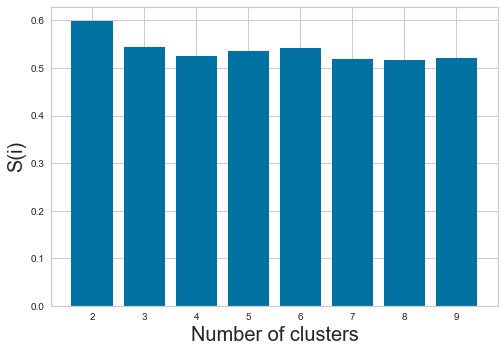

In [70]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df_model)
    silhouette_scores.append(silhouette_score(df_model, m1.fit_predict(df_model))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

#### Here we are using the Silhouette Score --> to measure the value of k

In [71]:
silhouette_scores

[0.5985167021545351,
 0.5443464868662674,
 0.5249002526556138,
 0.534881112080572,
 0.5418405019562248,
 0.5187526108171512,
 0.5164411589053336,
 0.5210544634097357]

In [72]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [182]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()